<a href="https://colab.research.google.com/github/Rafi653/Data-Mining/blob/feature%2FExpedia/Expedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
train_df = pd.read_csv("train.csv") 
train_df.head()

Saving train.csv to train (1).csv


,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
test_df = pd.read_csv("test.csv") 
test_df.head()

Saving test.csv to test.csv


,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


id                      0.000000
region                  0.000000
latitude                0.000000
longitude               0.000000
accommodation_type      0.000000
cost                    0.000000
minimum_nights          0.000000
number_of_reviews       0.000000
reviews_per_month      23.554007
owner_id                0.000000
owned_hotels            0.000000
yearly_availability     0.000000
dtype: float64


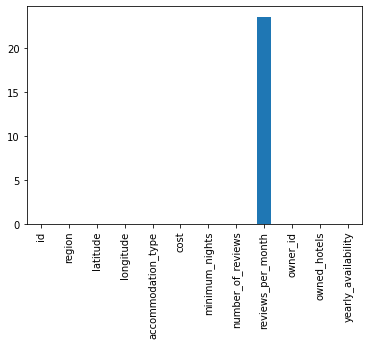

In [ ]:
# Calculate percentage of missing values in each column
df = train_df.copy()
missing_df = (df.isnull() | df.isna()).sum() * 100 / len(df)

print(missing_df)


missing_df.plot.bar()


In [ ]:
df.shape

(2870, 13)

In [ ]:
zero_review_df = df[df.number_of_reviews == 0]

if all(zero_review_df.reviews_per_month.isna()):
  print('Review per month are Null if reviews are zero')

df = df.fillna(0)

missing_df = (df.isnull() | df.isna()).sum() * 100 / len(df)

print(missing_df)

Review per month are Null if reviews are zero
id                     0.0
region                 0.0
latitude               0.0
longitude              0.0
accommodation_type     0.0
cost                   0.0
minimum_nights         0.0
number_of_reviews      0.0
reviews_per_month      0.0
owner_id               0.0
owned_hotels           0.0
yearly_availability    0.0
dtype: float64


id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

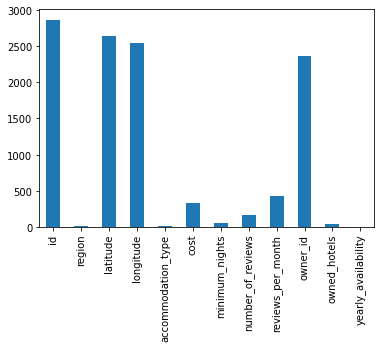

In [ ]:

"""
region: one-hot encoding
accommodation_type: one-hot encoding
owner_id: labelencoding

"""

categrical_cols = ['region', 'accommodation_type', 'owner_id']

df.nunique().plot.bar()
df.dtypes

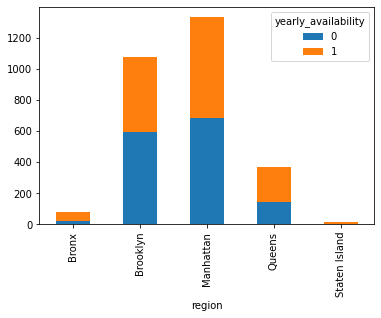

In [ ]:
ddd = pd.pivot_table(df,
               columns=['yearly_availability'], 
               index='region', 
               values='id',
               aggfunc=len)

ddd.plot.bar(stacked=True)


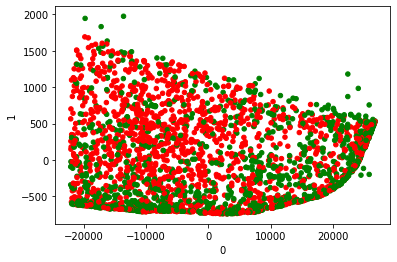

In [ ]:

"""
From above plot: 
  1. It is clear that after standardizing data and PCA, classes are classified properly
  2. We are able to see three clusters of data point after standardization
  3. We used different colors for classes of wine

"""

df = transformations(train_df)

del_cols = ['region', 'accommodation_type']

X=df.drop(del_cols, axis=1)

# scaler = StandardScaler()
# scaler.fit(X)
# std_X = scaler.transform(X)

# pca = PCA()
# pca.fit(std_X)

# X_std_transformed = pca.transform(std_X)

# X['color'] = X['yearly_availability'].replace(0, 'red').replace(1, 'green')

# dd = pd.DataFrame(X_std_transformed)

# dd.plot.scatter(x=0, y=1, c=X['color'])

# dd = pd.DataFrame(X)

# dd.plot.scatter(x=0, y=1, c=X['color'])



pca = PCA()
pca.fit(X)

ddf = pca.transform(X)
X['color'] = X['yearly_availability'].replace(0, 'red').replace(1, 'green')
ddf = pd.DataFrame(ddf)

ddf.plot.scatter(x=0, y=1, c=X['color'])


Text(0.5, 1.0, 'Correlation between different fearures')

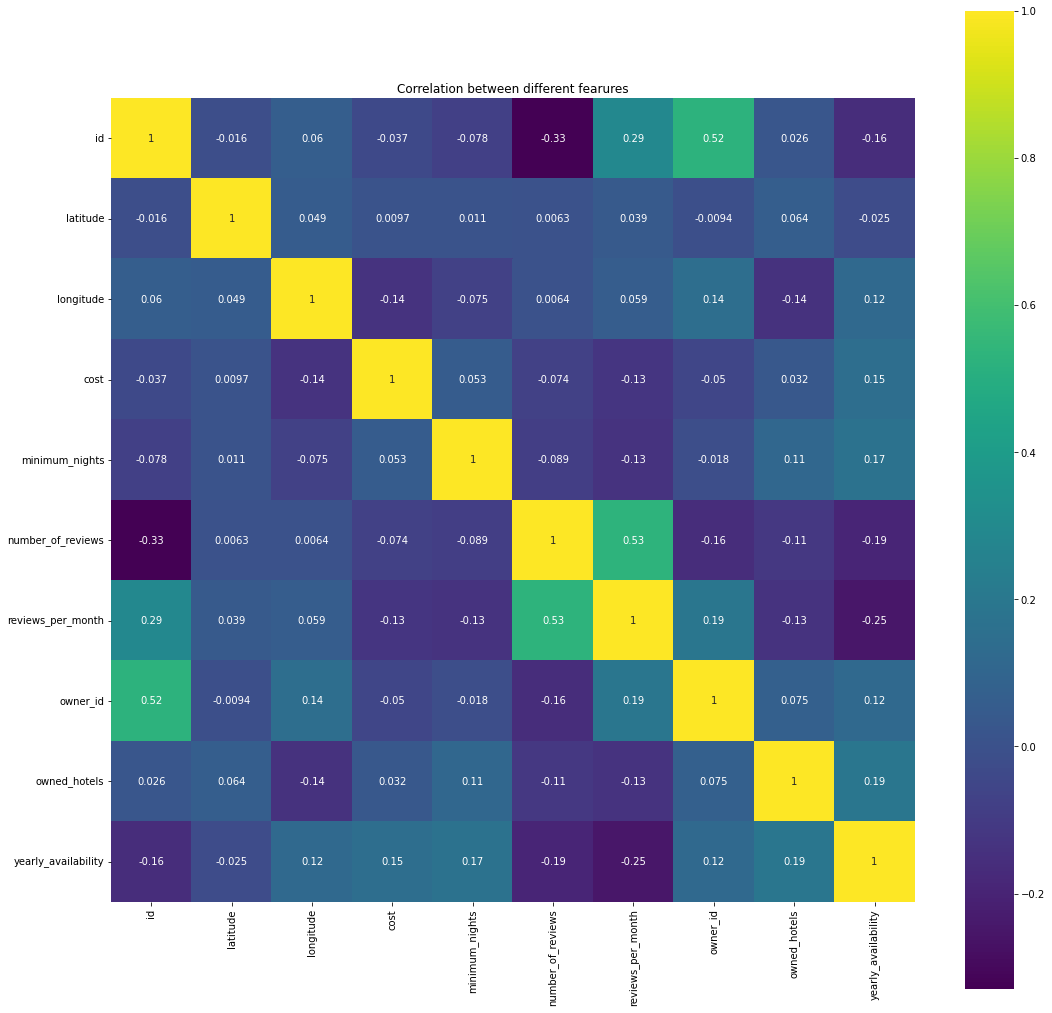

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [ ]:
print(df['region'].unique())
print(df['accommodation_type'].unique())

['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
['Entire home/apt' 'Private room' 'Shared room']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['region'])
d_cols = vectorizer.get_feature_names_out()

df[d_cols] = X.toarray()

X = vectorizer.fit_transform(df['accommodation_type'])
d_cols = vectorizer.get_feature_names_out()

df[d_cols] = X.toarray()
df.head()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x=le.fit_transform(df['owner_id'])
df['owner_id'] = x
df.head()




,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,bronx,brooklyn,island,manhattan,queens,staten,apt,entire,home,private,room,shared
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,141,1,0,0,0,0,1,0,0,1,1,1,0,0,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,59,1,0,0,1,0,0,0,0,1,1,1,0,0,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,984,1,1,0,0,0,0,1,0,0,0,0,1,1,0
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,2085,65,1,0,0,0,1,0,0,0,0,0,1,1,0
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,119,3,1,0,0,0,1,0,0,0,0,0,0,1,1


In [ ]:
y = df['yearly_availability']

del_cols = ['region', 'accommodation_type', 'yearly_availability']

df_new=df.drop(del_cols, axis=1)

df_new.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,bronx,brooklyn,island,manhattan,queens,staten,apt,entire,home,private,room,shared
0,13232,40.71854,-74.00439,170,5,7,0.56,141,1,0,0,0,1,0,0,1,1,1,0,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,59,1,0,1,0,0,0,0,1,1,1,0,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,984,1,0,0,0,0,1,0,0,0,0,1,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,2085,65,0,0,0,1,0,0,0,0,0,1,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,119,3,0,0,0,1,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

def transformations(df):

  # fill NaN's with 0
  df = df.fillna(0)

  vectorizer = CountVectorizer()

  vec = vectorizer.fit_transform(df['region'])
  d_cols = vectorizer.get_feature_names_out()

  df[d_cols] = vec.toarray()

  vec = vectorizer.fit_transform(df['accommodation_type'])
  d_cols = vectorizer.get_feature_names_out()

  df[d_cols] = vec.toarray()

  le = preprocessing.LabelEncoder()
  owner_id=le.fit_transform(df['owner_id'])
  df['owner_id'] = owner_id

  return df


df = transformations(train_df)
y = df['yearly_availability']
del_cols = ['region', 'accommodation_type', 'yearly_availability']

X=df.drop(del_cols, axis=1)


test_df = transformations(test_df)
del_cols = ['region', 'accommodation_type']

X_test=test_df.drop(del_cols, axis=1)



In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 1)


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
"""
tune model: 
n_estimators = increase
max_depth = 

"""

model.fit(X_train, y_train)


[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_val_pred=model.predict(X_val)
y_train_pred=model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_val,y_val_pred))

0.04204771741884938
0.052257047499448483


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_train,model.predict(X_train)))
print(r2_score(y_val,model.predict(X_val)))

0.831787083038368
0.7909083481258101


In [ ]:
df.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
is_na                     bool
bronx                    int64
brooklyn                 int64
island                   int64
manhattan                int64
queens                   int64
staten                   int64
apt                      int64
entire                   int64
home                     int64
private                  int64
room                     int64
shared                   int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3)

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_val)

In [ ]:
mse = mean_squared_error(y_val, predicted)
r2 = r2_score(y_val, predicted)
MSE_Score.append(mse)
R2_Score.append(r2)

print(mse, r2)
# cm = confusion_matrix(y_val, predicted)  
# print(cm)  
# print('Accuracy', accuracy_score(y_val, predicted))

0.09815524186926115 0.6072598310730994


ValueError: ignored

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_val)

[07:53:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mse = mean_squared_error(y_val, predicted)
r2 = r2_score(y_val, predicted)
MSE_Score.append(mse)
R2_Score.append(r2)

print(mse, r2)
cm = confusion_matrix(y_val, predicted)  
print(cm)  
print('Accuracy', accuracy_score(y_val, predicted))

0.052257047499448483 0.7909083481258101


ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
pca = PCA(n_components=21)
logReg = LogisticRegression() 

pipe = Pipeline([('pca', pca), ('logistic', logReg)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

cm = confusion_matrix(y_val, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_val, y_pred))

[[366  57]
 [ 76 362]]
Accuracy 0.8455284552845529


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# pca = PCA()  
# X_train = pca.fit_transform(X_train)  
# X_test = pca.transform(X_val)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)

cm = confusion_matrix(y_val, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_val, y_pred))

[[280 143]
 [ 17 421]]
Accuracy 0.8141695702671312


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

cm = confusion_matrix(y_val, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_val, y_pred))

fi = clf.feature_importances_
print(fi)

pd.DataFrame(fi, columns=X_train.columns).plot.bar()

# fi.plot.bar()


# y_test_pred = clf.predict(X_test)

# X_test['yearly_availability'] = y_test_pred

# X_test[['id', 'yearly_availability']]


[[375  39]
 [ 36 411]]
Accuracy 0.9128919860627178
[0.02735033 0.01004642 0.01115684 0.01015186 0.01718922 0.00199283
 0.01037318 0.00724589 0.19241388 0.00241503 0.         0.
 0.         0.         0.         0.         0.07708994 0.00359115
 0.62898344 0.         0.        ]


ValueError: ignored

In [ ]:
cols = list(X_train.columns)

d = pd.DataFrame(fi, columns=cols)

NameError: ignored

In [ ]:
y_pred

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
sample = pd.read_csv("sample_output.csv") 
sample.head()

Saving sample_output.csv to sample_output.csv


,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,1
4,28873,0


In [ ]:
y_val = sample['yearly_availability']
y_pred = y_test_pred


cm = confusion_matrix(y_val, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_val, y_pred))

[[207 157]
 [192 162]]
Accuracy 0.5139275766016713


In [ ]:
# Negative vavlues

# from sklearn.naive_bayes import MultinomialNB

# nb = MultinomialNB().fit(X_train,y_train)

# y_pred = nb.predict(X_val)

# cm = confusion_matrix(y_val, y_pred)  
# print(cm)  
# print('Accuracy', accuracy_score(y_val, y_pred))

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i)

['LinearRegression', 'XGB Regressor']
[0.09815524186926115, 0.052257047499448483]
[0.6072598310730994, 0.7909083481258101]
